In [13]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

# Data analysis 

We have decieded to do segmentation on three different organs: pancreas, spleen and liver. We have chosen these organs because they are all located in the same region of the body and are therefore likely to have similar intensity distributions.

Therefore we need to look closer into these three organs given our dataset


## Loading data

In [14]:
data_path = '/cluster/projects/vc/data/mic/open/MSD'
tasks = [x for x in os.listdir(data_path) if x.startswith('Task')]

# Check if the path exists
if os.path.exists(data_path):
    # List all directories that start with 'Task'
    tasks = [x for x in os.listdir(data_path) if x.startswith('Task') and os.path.isdir(os.path.join(data_path, x))]
    print(tasks)
else:
    print(f"Path {data_path} does not exist!")

tasks = ['Task09_Spleen', 'Task07_Pancreas', 'Task03_Liver']


['Task09_Spleen', 'Task01_BrainTumour', 'Task05_Prostate', 'Task10_Colon', 'Task08_HepaticVessel', 'Task06_Lung', 'Task04_Hippocampus', 'Task02_Heart', 'Task03_Liver', 'Task07_Pancreas']


- imagesTr: Training images.
- imagesTs: Test images (without ground truth segmentations).
- labelsTr: Ground truth segmentations for the training images.
- dataset.json: Metadata and information about the dataset.

## Data Understanding and Quality Check

- Dataset Size and Distribution: Assess the distribution of dataset sizes among the three tasks (liver, pancreas, spleen). Check for imbalances.
- Image Quality and Characteristics: Examine the quality of the medical images. Look for variations in resolution, contrast, or any artifacts that might affect segmentation.
- Annotation Quality: Review the quality of segmentation annotations. Ensure that the annotated regions are accurate and consistent across different images.


In [16]:
def plot_tasks(task):
    # Paths
    path_training = os.path.join(data_path, task, 'imagesTr')
    path_test = os.path.join(data_path, task, 'imagesTs')
    path_gt = os.path.join(data_path, task, 'labelsTr')

    imglist_training = glob(os.path.join(path_training, '*.nii.gz'))
    imglist_gt = glob(os.path.join(path_gt, '*.nii.gz'))
    imglist_test = glob(os.path.join(path_test, '*.nii.gz'))

    print('num_train = {}, num_test = {}'.format(len(imglist_training), len(imglist_test)))

    try: 
        for i in range(min(3, len(imglist_training))):  # Show up to 3 images
            img = nib.load(imglist_training[i]).get_fdata()
            label = nib.load(imglist_gt[i]).get_fdata()

            print('Image Shape: ', img.shape)
            print('Image Min-Max values: Image={},{} and label={},{}'.format(img.max(), img.min(), label.max(), label.min()))
            print('Image Statistics: Mean={}, Median={}, Std Dev={}'.format(np.mean(img), np.median(img), np.std(img)))
            print('Number of subclasses in label = ', int(label.max()) + 1)

            # Display multiple slices
            fig, axes = plt.subplots(1, 4, figsize=(15, 5))
            slices = [img.shape[2] // 4, img.shape[2] // 2, 3 * img.shape[2] // 4]  # Change as per your dataset
            for j, slice_idx in enumerate(slices):
                axes[j].imshow(img[:, :, slice_idx], cmap='gray')
                axes[j].set_title(f'Slice {slice_idx}')
                axes[j].axis('off')
            axes[3].hist(img.flatten(), bins=50, color='gray')
            axes[3].set_title('Histogram')
            plt.show()
    except Exception as e:
        print(f'something didn\'t work: {e}')


### Task09: Spleen

num_train = 41, num_test = 20
Image Shape:  (512, 512, 31)
Image Min-Max values: Image=1166.0,-1024.0 and label=1.0,0.0
Image Statistics: Mean=-428.51336694532824, Median=-114.0, Std Dev=485.81054320686843
Number of subclasses in label =  2


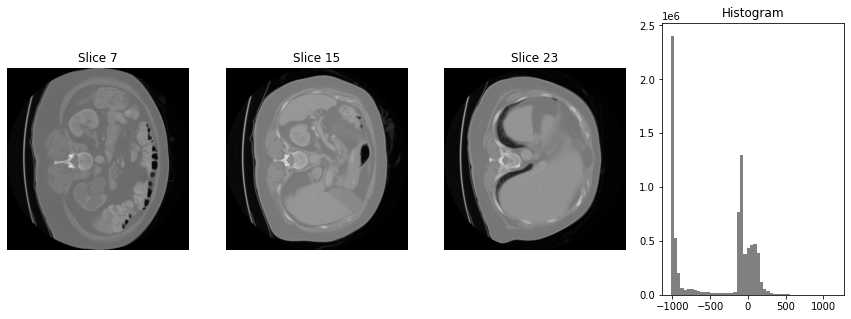

Image Shape:  (512, 512, 119)
Image Min-Max values: Image=2976.0,-1024.0 and label=1.0,0.0
Image Statistics: Mean=-529.6429643390559, Median=-846.0, Std Dev=481.18767655807073
Number of subclasses in label =  2


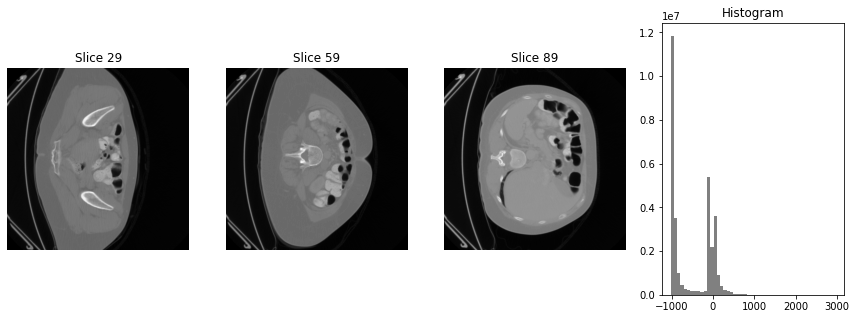

Image Shape:  (512, 512, 168)
Image Min-Max values: Image=3072.0,-1024.0 and label=1.0,0.0
Image Statistics: Mean=-568.8911424818493, Median=-904.0, Std Dev=497.4961755361271
Number of subclasses in label =  2


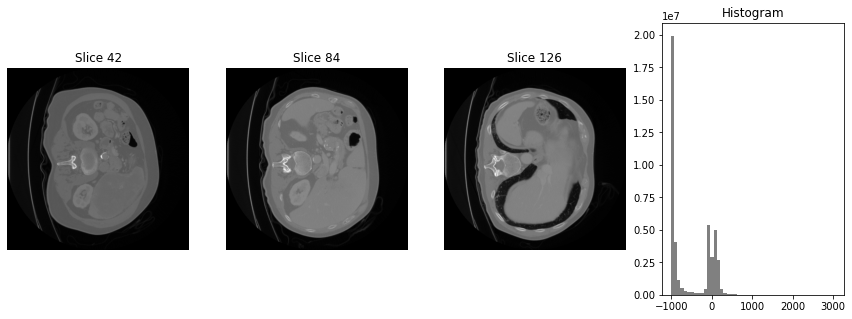

In [17]:
task = 'Task09_Spleen'
plot_tasks(task=task)

### Task07: Pancreas

num_train = 281, num_test = 139
Image Shape:  (512, 512, 89)
Image Min-Max values: Image=1432.0,-1024.0 and label=2.0,0.0
Image Statistics: Mean=-501.3723579578185, Median=-832.0, Std Dev=515.1411439566818
Number of subclasses in label =  3


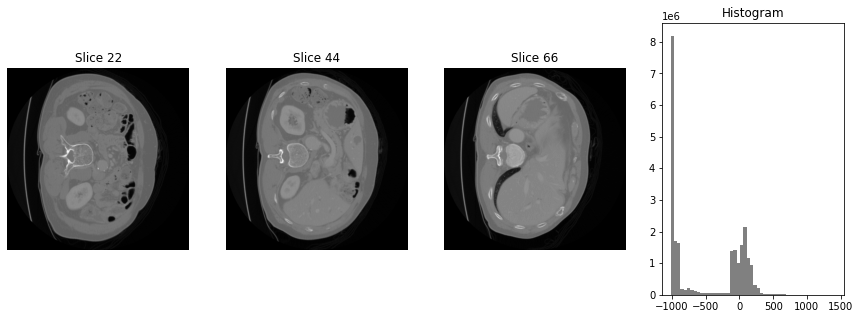

Image Shape:  (512, 512, 72)
Image Min-Max values: Image=1342.0,-1024.0 and label=2.0,0.0
Image Statistics: Mean=-501.19787735409204, Median=-351.0, Std Dev=487.9404617478372
Number of subclasses in label =  3


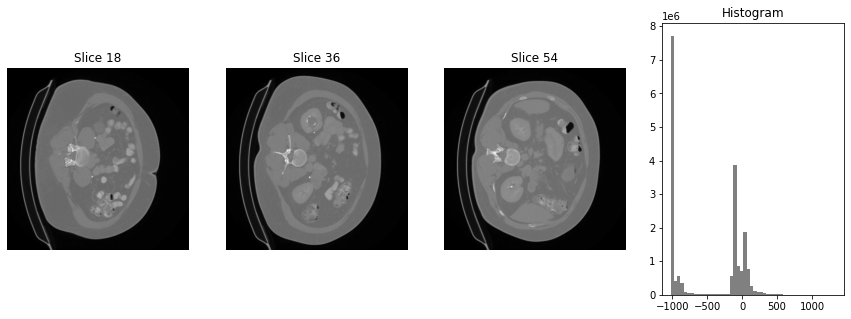

Image Shape:  (512, 512, 61)
Image Min-Max values: Image=1149.0,-1024.0 and label=2.0,0.0
Image Statistics: Mean=-476.05712246503987, Median=-453.0, Std Dev=481.9135005978994
Number of subclasses in label =  3


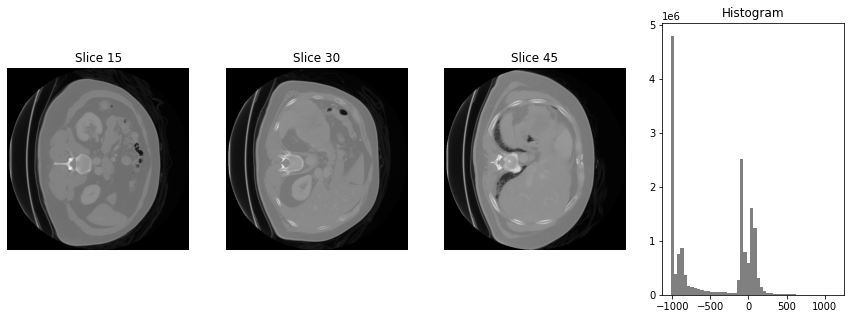

In [18]:
task = 'Task07_Pancreas'
plot_tasks(task)

### Task03: Liver

num_train = 131, num_test = 70


Image Shape:  (512, 512, 541)
Image Min-Max values: Image=1623.0,-1024.0 and label=2.0,0.0
Image Statistics: Mean=-561.0832951134984, Median=-907.0, Std Dev=497.50593602043165
Number of subclasses in label =  3


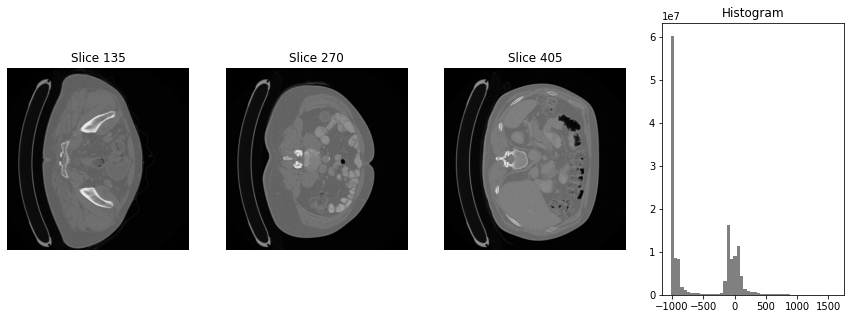

Image Shape:  (512, 512, 212)
Image Min-Max values: Image=1448.0,-1024.0 and label=2.0,0.0
Image Statistics: Mean=-506.187293844403, Median=-755.0, Std Dev=489.1625439835541
Number of subclasses in label =  3


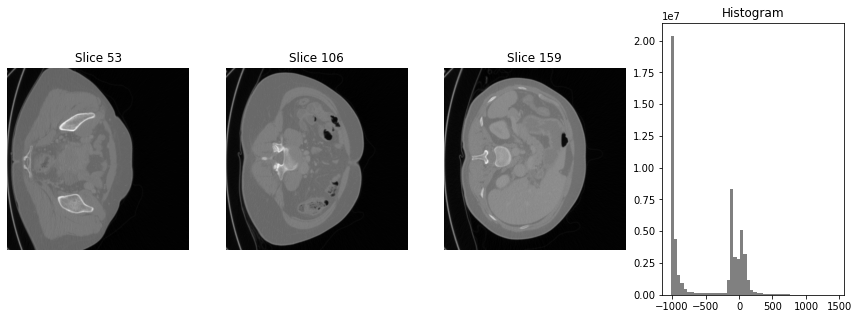

Image Shape:  (512, 512, 260)
Image Min-Max values: Image=1023.0,-1024.0 and label=2.0,0.0
Image Statistics: Mean=-610.6197166296151, Median=-938.0, Std Dev=494.5569523958856
Number of subclasses in label =  3


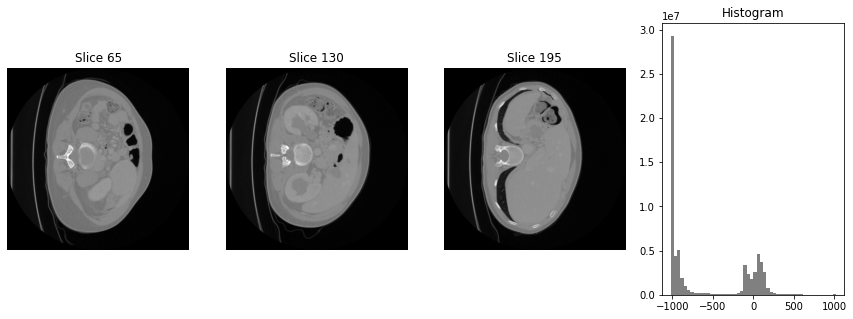

In [19]:
task = 'Task03_Liver'
plot_tasks(task=task)

### Analysis

- 16-bit signed integer format: By looking at the min-max values of the images, we can see that the images are stored in a 16-bit signed integer format. This is a common format for medical images, as it allows for a wide range of pixel values (from -32768 to 32767). The negative values are used to represent air, while the positive values represent different tissues and densities.

- Predominance of Low-Density Areas: The negative mean and median values suggest that the liver is surrounded by low-density areas (like the abdominal cavity, which contains air and fluids).

- Wide Range of Intensities: The high standard deviation and the wide range of pixel values indicate the presence of various tissues and densities, which is expected in abdominal CT scans.

- Image shapes: Tells us the size of each slice and number of slices that are depicted for each organ. This is important to know, as we will need to resize the images to a uniform size before feeding them into the neural network.

**Summary**:
Here we can see what we have to work with. 


| Task         | Number of Training Samples | Number of Test Samples | Image Shape          |
|--------------|----------------------------|------------------------|----------------------|
| Task03_Liver | 131                        | 70                     | (512, 512, 260)      |
| Task07_Pancreas | 281                     | 139                    | (512, 512, 89)       | 
| Task09_Spleen | 41                        | 20                     | (512, 512, 31)       |

We can also see the different image shapes, which can be helpful. 

